In [1]:
# importing all neccessary librearies

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [2]:
# Reading of the dataset

df = pd.read_csv("Freelance_platform_Projects.csv")
df.head()

,Title,Category Name,Experience,Sub Category Name,Currency,Budget,Location,Freelancer Preferred From,Type,Date Posted,Description,Duration,Client Registration Date,Client City,Client Country,Client Currency,Client Job Title
0,i need an interactive form building n my site,Technology & Programming,Entry ($),Website Development,GBP,20.0,remote,ALL,fixed_price,2023-01-30 16:04:50,i want to cllect leads/data on my site. i want...,NaN,2016-05-17,Tadcaster,United Kingdom,GBP,Paid Social Media Manager
1,3D model of BIG MINING MACHINE,Design,Expert ($$$),3D Design,EUR,2007.0,remote,ALL,fixed_price,2023-01-30 16:04:50,"Hi everyone,\ntoday im looking for ""SKILLED"" 3...",NaN,2019-06-05,Ostrava,Czech Republic,USD,indie game and VR company
2,Sales Email Template,"Marketing, Branding & Sales",Expert ($$$),Sales & Calls,GBP,25.0,remote,ALL,hourly,2023-01-30 15:55:38,Looking for a template that can be used when w...,NaN,2022-12-05,Ardrossan,United Kingdom,GBP,NaN
3,Need Writer to Write a Review Article,Writing & Translation,Entry ($),Content Writing,USD,30.0,remote,ALL,fixed_price,2023-01-30 15:55:38,I need a writer who can able to write a review...,NaN,2014-10-08,Kolkata,India,USD,Blogging | Digital Marketing | SEO
4,I need a 3d work of my house,Design,Intermediate ($$),3D Design,GBP,30.0,remote,ALL,fixed_price,2023-01-30 15:41:40,I require 3d work of my house. 3d plan already...,NaN,2022-01-02,Gloucester,United Kingdom,GBP,NaN


In [3]:
# now we will check the shape and size of the dataset

print(df.shape)
print(df.size)

(1402, 17)
23834


In [4]:
# Now the most important part of machine learning is that to explore the Data
# Before creating any machine learning model it is very important to have
# the neat and clean data
# The neat and clean data means such a data which do not have outliers, skewness,
# null values, and of course,should be numeric in  nature
# so lets move towards Exploratory data analysis

# EXPLORATORY DATA ANALYSIS

In [5]:
# lets do some analysis about out featuers and their datatypes

df.info()
# A i can see there are 1402 total entries but in two columns namely Duration
# and Client Job Title 
# have not equal non-null entries as total total entries 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1402 entries, 0 to 1401
Data columns (total 17 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Title                      1402 non-null   object 
 1   Category Name              1402 non-null   object 
 2   Experience                 1402 non-null   object 
 3   Sub Category Name          1402 non-null   object 
 4   Currency                   1402 non-null   object 
 5   Budget                     1402 non-null   float64
 6   Location                   1402 non-null   object 
 7   Freelancer Preferred From  1402 non-null   object 
 8   Type                       1402 non-null   object 
 9   Date Posted                1402 non-null   object 
 10  Description                1402 non-null   object 
 11  Duration                   183 non-null    object 
 12  Client Registration Date   1402 non-null   object 
 13  Client City                1402 non-null   objec

In [6]:
df.columns = df.columns.str.replace(" ", "_")
df.columns

Index(['Title', 'Category_Name', 'Experience', 'Sub_Category_Name', 'Currency',
       'Budget', 'Location', 'Freelancer_Preferred_From', 'Type',
       'Date_Posted', 'Description', 'Duration', 'Client_Registration_Date',
       'Client_City', 'Client_Country', 'Client_Currency', 'Client_Job_Title'],
      dtype='object')

In [7]:
df.isnull().sum()

Title                           0
Category_Name                   0
Experience                      0
Sub_Category_Name               0
Currency                        0
Budget                          0
Location                        0
Freelancer_Preferred_From       0
Type                            0
Date_Posted                     0
Description                     0
Duration                     1219
Client_Registration_Date        0
Client_City                     0
Client_Country                  0
Client_Currency                 0
Client_Job_Title              838
dtype: int64

In [8]:
# So, there are two such columns which has over 60-70% null values 
# So, there is no sense of keeping those columns, so we prefer to
# delete those columns

df = df.drop(df[["Duration","Client_Job_Title"]], axis =1)
df.head()

,Title,Category_Name,Experience,Sub_Category_Name,Currency,Budget,Location,Freelancer_Preferred_From,Type,Date_Posted,Description,Client_Registration_Date,Client_City,Client_Country,Client_Currency
0,i need an interactive form building n my site,Technology & Programming,Entry ($),Website Development,GBP,20.0,remote,ALL,fixed_price,2023-01-30 16:04:50,i want to cllect leads/data on my site. i want...,2016-05-17,Tadcaster,United Kingdom,GBP
1,3D model of BIG MINING MACHINE,Design,Expert ($$$),3D Design,EUR,2007.0,remote,ALL,fixed_price,2023-01-30 16:04:50,"Hi everyone,\ntoday im looking for ""SKILLED"" 3...",2019-06-05,Ostrava,Czech Republic,USD
2,Sales Email Template,"Marketing, Branding & Sales",Expert ($$$),Sales & Calls,GBP,25.0,remote,ALL,hourly,2023-01-30 15:55:38,Looking for a template that can be used when w...,2022-12-05,Ardrossan,United Kingdom,GBP
3,Need Writer to Write a Review Article,Writing & Translation,Entry ($),Content Writing,USD,30.0,remote,ALL,fixed_price,2023-01-30 15:55:38,I need a writer who can able to write a review...,2014-10-08,Kolkata,India,USD
4,I need a 3d work of my house,Design,Intermediate ($$),3D Design,GBP,30.0,remote,ALL,fixed_price,2023-01-30 15:41:40,I require 3d work of my house. 3d plan already...,2022-01-02,Gloucester,United Kingdom,GBP


In [9]:
# now we can see our data does not contain any null values
df.isnull().sum()

Title                        0
Category_Name                0
Experience                   0
Sub_Category_Name            0
Currency                     0
Budget                       0
Location                     0
Freelancer_Preferred_From    0
Type                         0
Date_Posted                  0
Description                  0
Client_Registration_Date     0
Client_City                  0
Client_Country               0
Client_Currency              0
dtype: int64

In [10]:
df["Title"].nunique()
df["Description"].nunique()
df = df.drop(df[["Title","Description"]], axis = 1)

In [11]:
# now we will check for all data type of all columns
df.dtypes

Category_Name                 object
Experience                    object
Sub_Category_Name             object
Currency                      object
Budget                       float64
Location                      object
Freelancer_Preferred_From     object
Type                          object
Date_Posted                   object
Client_Registration_Date      object
Client_City                   object
Client_Country                object
Client_Currency               object
dtype: object

In [12]:
# As two columns namely Date Posted and Client Registration Date are object but
# actualy should be date time
# So lets convert it to datetime data
df["Client_Registration_Date"] = pd.to_datetime(df["Client_Registration_Date"])
df["Date_Posted"] = pd.to_datetime(df["Date_Posted"])


In [13]:
# lets do some feature engineering here
import datetime as dt
df["Day_registered"] = df["Client_Registration_Date"].dt.day
df["Day_Posted"] = df["Date_Posted"].dt.day

In [14]:
df = df.drop(df[["Client_Registration_Date","Date_Posted"]], axis  = 1)


<AxesSubplot: >

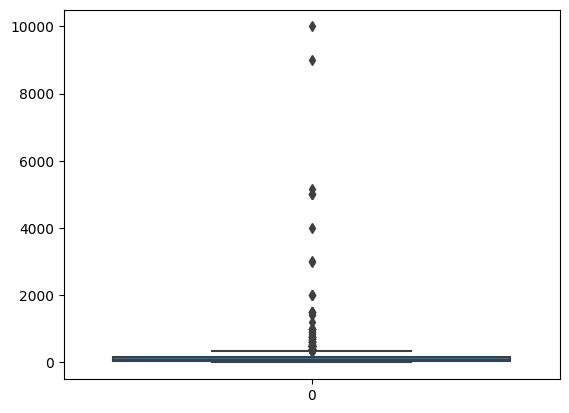

In [15]:
# now we will check for outliers in our data in case of numeric column
sns.boxplot(df["Budget"])

In [16]:
np.where(df["Budget"]>240)

(array([   1,   13,   21,   25,   34,   40,   56,   57,   58,   62,   63,
          66,   78,   85,   87,  101,  103,  111,  115,  118,  124,  132,
         133,  165,  207,  210,  229,  233,  237,  239,  246,  247,  250,
         263,  270,  272,  277,  285,  299,  311,  313,  314,  316,  317,
         319,  330,  360,  363,  373,  379,  382,  383,  391,  398,  404,
         409,  413,  417,  419,  431,  439,  452,  469,  479,  482,  484,
         487,  489,  490,  491,  492,  499,  500,  502,  523,  530,  531,
         538,  546,  547,  549,  552,  558,  559,  577,  589,  596,  604,
         608,  620,  624,  627,  631,  633,  635,  643,  644,  652,  653,
         656,  657,  658,  665,  669,  679,  683,  684,  688,  693,  697,
         702,  710,  711,  733,  742,  767,  784,  792,  802,  808,  818,
         822,  829,  830,  832,  836,  840,  851,  858,  859,  865,  870,
         872,  876,  877,  896,  907,  916,  917,  923,  924,  926,  928,
         935,  939,  940,  949,  956, 

<AxesSubplot: >

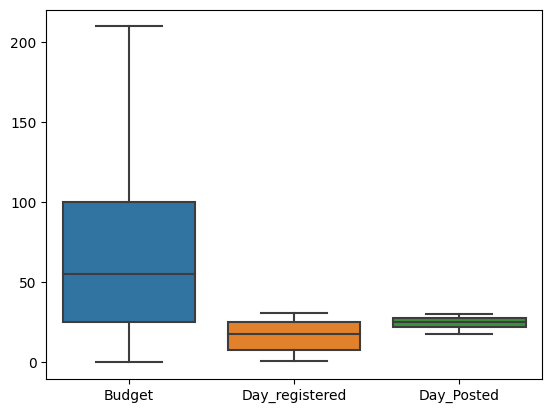

In [17]:
# Budget column contains 15 to 20 % outliers 
# so we will prefer to delete that outliers to make model perform well
df = df.drop(np.where(df["Budget"]>210)[0], axis = 0)
sns.boxplot(df)

In [18]:
df.reset_index()
df= df.reset_index(drop = True)
df.head()

,Category_Name,Experience,Sub_Category_Name,Currency,Budget,Location,Freelancer_Preferred_From,Type,Client_City,Client_Country,Client_Currency,Day_registered,Day_Posted
0,Technology & Programming,Entry ($),Website Development,GBP,20.0,remote,ALL,fixed_price,Tadcaster,United Kingdom,GBP,17,30
1,"Marketing, Branding & Sales",Expert ($$$),Sales & Calls,GBP,25.0,remote,ALL,hourly,Ardrossan,United Kingdom,GBP,5,30
2,Writing & Translation,Entry ($),Content Writing,USD,30.0,remote,ALL,fixed_price,Kolkata,India,USD,8,30
3,Design,Intermediate ($$),3D Design,GBP,30.0,remote,ALL,fixed_price,Gloucester,United Kingdom,GBP,2,30
4,Technology & Programming,Entry ($),Website Development,GBP,20.0,remote,ALL,hourly,Leeds,United Kingdom,GBP,11,30


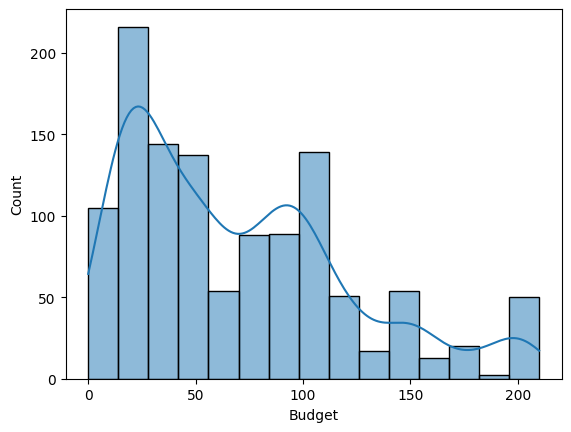

In [19]:
# lets check for skewness in numeric feature
sns.histplot(df["Budget"], kde = True)
plt.show()
# it is highly positive skewed
# so to perform model well it would be better to resolve this problem

In [20]:
df["Budget"] = np.sqrt(df["Budget"])

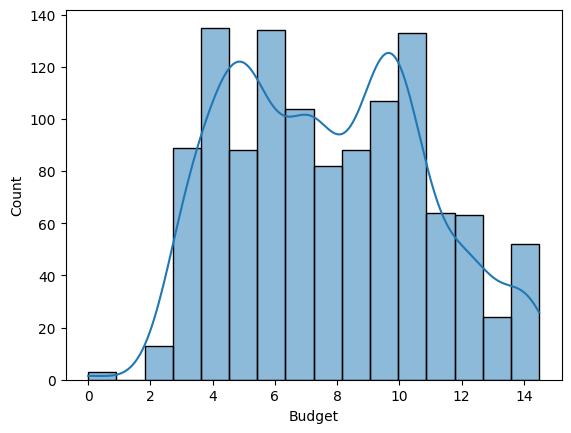

In [21]:
# lets check for skewness in numeric feature
sns.histplot(df["Budget"], kde = True)
plt.show()
# So, now it seems better than previous distribution or skewness problem resolved to some extent

In [22]:
data = df.copy()

In [23]:
# Before creating model we will see total budgets for each category

Total_Budget = data.groupby("Category_Name")["Budget"].sum()
Total_Budget = [Total_Budget[0],Total_Budget[1],Total_Budget[2],Total_Budget[3],
                Total_Budget[4],Total_Budget[5],Total_Budget[6],
               Total_Budget[7],Total_Budget[8]]
type(Total_Budget[0])

numpy.float64

In [24]:
pc = data["Category_Name"].unique()
Projects_Categories = []
for i in pc:
    Projects_Categories.append(i)
type(Projects_Categories[0])

str

In [25]:
d = {"Projects_Categories" : Projects_Categories, "Total_Budget" : Total_Budget}
type(d)

dict

In [26]:
budget = pd.DataFrame(d)

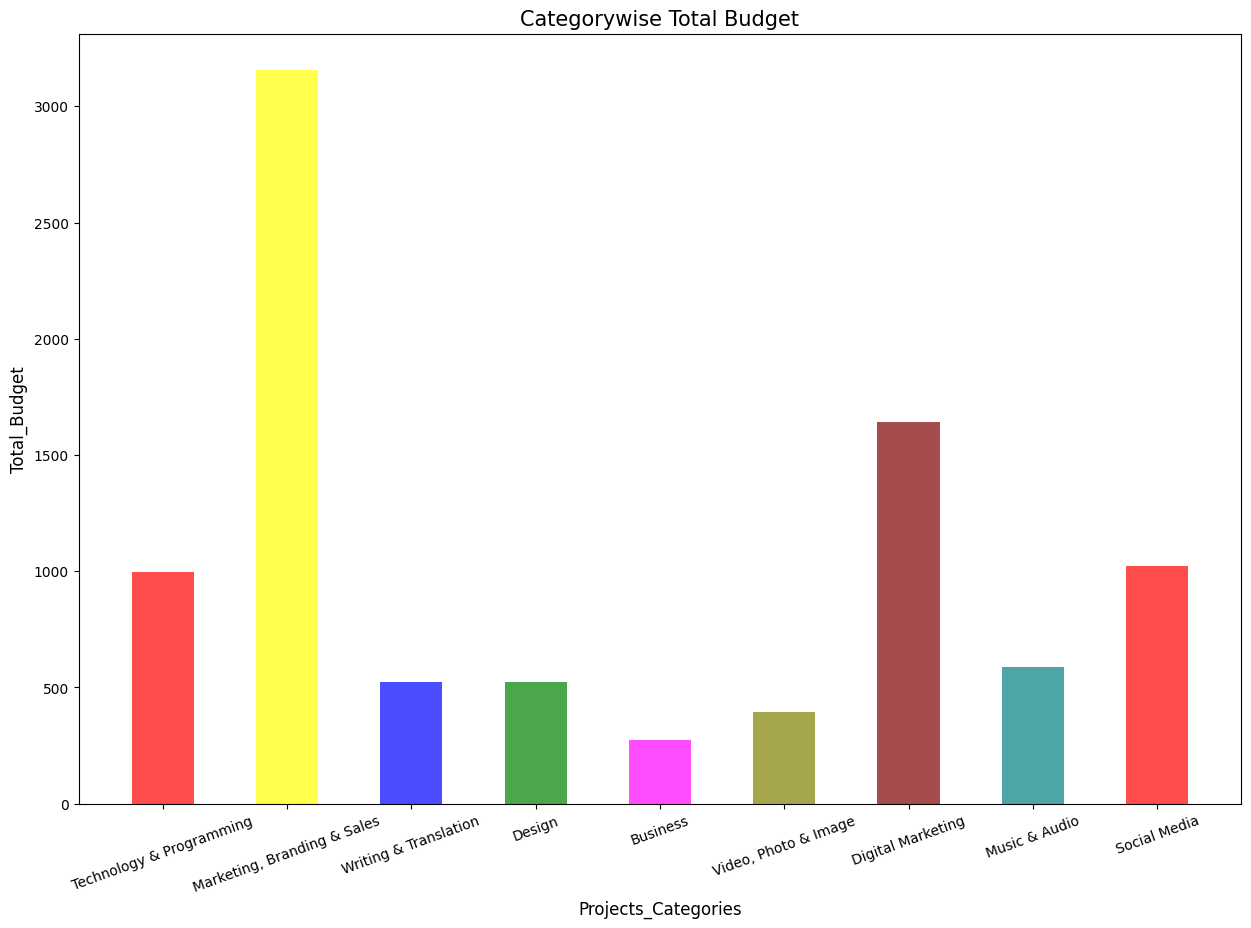

In [27]:
x = budget["Projects_Categories"]
y = budget["Total_Budget"]
fig = plt.figure(figsize = (15,10))
plt.bar( x, y , width = 0.5,
        color = ["red", "yellow", "blue", "green","magenta",
                 "olive","maroon","teal"],
        alpha = 0.7)
plt.xticks(rotation = 20)
plt.xlabel("Projects_Categories", fontsize = 12)
plt.ylabel("Total_Budget", fontsize = 12)
plt.title("Categorywise Total Budget", fontsize = 15)
plt.show()     

# CLUSTERS OF THE PROJECTS

In [28]:
data.head()

,Category_Name,Experience,Sub_Category_Name,Currency,Budget,Location,Freelancer_Preferred_From,Type,Client_City,Client_Country,Client_Currency,Day_registered,Day_Posted
0,Technology & Programming,Entry ($),Website Development,GBP,4.472136,remote,ALL,fixed_price,Tadcaster,United Kingdom,GBP,17,30
1,"Marketing, Branding & Sales",Expert ($$$),Sales & Calls,GBP,5.000000,remote,ALL,hourly,Ardrossan,United Kingdom,GBP,5,30
2,Writing & Translation,Entry ($),Content Writing,USD,5.477226,remote,ALL,fixed_price,Kolkata,India,USD,8,30
3,Design,Intermediate ($$),3D Design,GBP,5.477226,remote,ALL,fixed_price,Gloucester,United Kingdom,GBP,2,30
4,Technology & Programming,Entry ($),Website Development,GBP,4.472136,remote,ALL,hourly,Leeds,United Kingdom,GBP,11,30


In [29]:
# As we know any machine learning model only works on numeric data
# So we will convert all categorical collumns into numerical data using 
#label encoder of sklearn library

from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
data["Category_Name"] = encoder.fit_transform(data["Category_Name"])
data["Experience"] = encoder.fit_transform(data["Experience"])
data["Sub_Category_Name"] = encoder.fit_transform(data["Sub_Category_Name"])
data["Currency"] = encoder.fit_transform(data["Currency"])
data["Location"] = encoder.fit_transform(data["Location"])
data["Freelancer_Preferred_From"] = encoder.fit_transform(data["Freelancer_Preferred_From"])
data["Type"] = encoder.fit_transform(data["Type"])
data["Client_City"] = encoder.fit_transform(data["Client_City"])
data["Client_Country"] = encoder.fit_transform(data["Client_Country"])
data["Client_Currency"] = encoder.fit_transform(data["Client_Currency"])
data.head()

,Category_Name,Experience,Sub_Category_Name,Currency,Budget,Location,Freelancer_Preferred_From,Type,Client_City,Client_Country,Client_Currency,Day_registered,Day_Posted
0,6,0,85,1,4.472136,1,0,0,402,63,1,17,30
1,3,1,67,1,5.000000,1,0,1,13,63,1,5,30
2,8,0,21,2,5.477226,1,0,0,210,24,2,8,30
3,1,2,0,1,5.477226,1,0,0,150,63,1,2,30
4,6,0,85,1,4.472136,1,0,1,223,63,1,11,30


KMeans Clustering

In [30]:
# we will create clusters of the projects by applying KMeans cluster
x = data.iloc[:, [0,4]].values

In [31]:
from sklearn.cluster import KMeans
wcss_list = []
for i in range(1,11):
    k = KMeans(n_clusters = i)
    k.fit(x)
    wcss = k.inertia_
    wcss_list.append(wcss)
wcss_list

[20854.630968527712,
 12491.983302560655,
 7138.490984788098,
 4208.564398345453,
 3360.3549328432296,
 2705.2488639880644,
 2236.4670006933925,
 1936.3467964373158,
 1676.283215393321,
 1516.8260323335944]

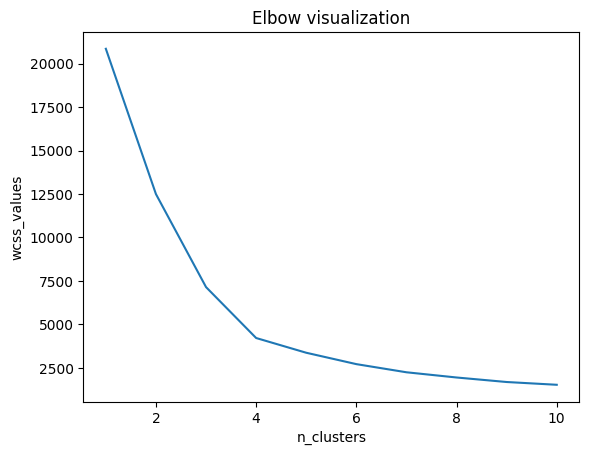

In [32]:
# for declaration of optimum value for number of clusters lets plot the elbow method
#  the first sharp bent will give the best value for number of clusters
plt.plot(range(1,11), wcss_list)
plt.title("Elbow visualization")
plt.xlabel("n_clusters")
plt.ylabel("wcss_values")
plt.show()

In [33]:
from sklearn.cluster import KMeans
model = KMeans(n_clusters = 4)
pred = model.fit_predict(x)
pred[:5]


array([3, 1, 3, 1, 3])

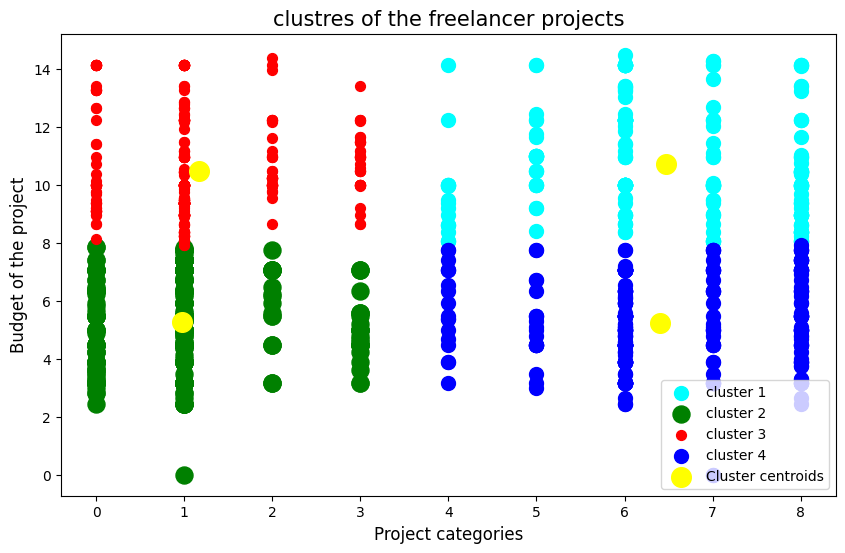

In [34]:
plt.figure(figsize = (10,6))
plt.scatter(x[pred == 0, 0],x[pred == 0, 1],s = 100, c = "cyan", 
            label = "cluster 1")
plt.scatter( x[pred == 1, 0],x[pred == 1, 1],s = 150, c = "green",
            label = "cluster 2")
plt.scatter( x[pred == 2, 0],x[pred == 2, 1],s = 50, c = "red",
            label = "cluster 3")
plt.scatter( x[pred == 3, 0],x[pred == 3, 1],s = 100, c = "blue",
            label = "cluster 4")
plt.scatter(model.cluster_centers_[:,0],
            model.cluster_centers_[:,1],s=200,c="yellow",
            label = "Cluster centroids")
plt.xlabel("Project categories", fontsize = 12)
plt.ylabel("Budget of the project", fontsize = 12)
plt.title("clustres of the freelancer projects", fontsize = 15)
plt.legend(loc = "lower right")
plt.show()

In [35]:
# lets do principal components analysis
# by setting number of componets to 2 
# then we will create clusters of projects on that components
from sklearn.decomposition import PCA
pca = PCA(n_components = 2)
data_t = pca.fit_transform(data)

In [36]:

from sklearn.cluster import KMeans

wcss_list = []
for i in range(1,11):
    k = KMeans(n_clusters = i)
    k.fit(data_t)
    wcss = k.inertia_
    wcss_list.append(wcss)
wcss_list

[17759990.96449049,
 6048870.877046975,
 2460965.6079544923,
 1903065.6984587773,
 1474610.232014188,
 1262616.1434250786,
 1090677.5230566605,
 953712.4252858235,
 839332.6302082844,
 744728.412339313]

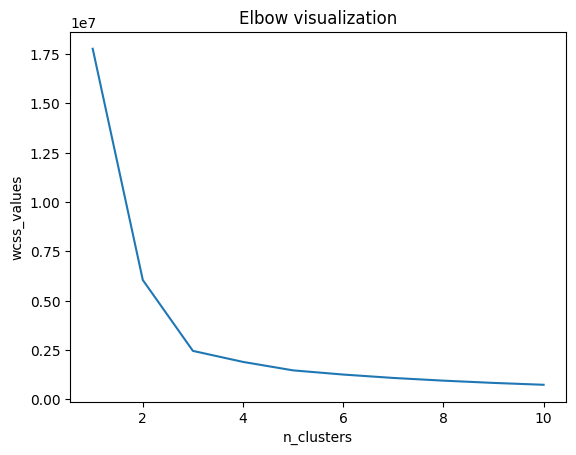

In [37]:
plt.plot(range(1,11), wcss_list)
plt.title("Elbow visualization")
plt.xlabel("n_clusters")
plt.ylabel("wcss_values")
plt.show()

In [38]:
from sklearn.cluster import KMeans
model = KMeans(n_clusters = 3)
pred = model.fit_predict(data_t)
pred[:5]


array([1, 0, 2, 0, 2])

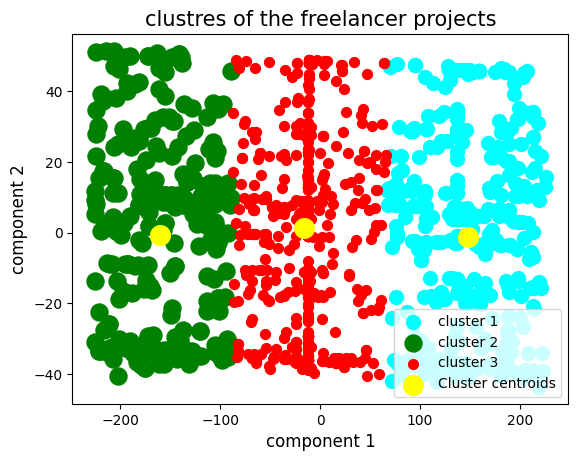

In [39]:
#plt.figure(figsize = (10,6))
plt.subplots
plt.scatter(data_t[pred == 0, 0],data_t[pred == 0, 1],s = 100,
            c = "cyan", label = "cluster 1")
plt.scatter( data_t[pred == 1, 0],data_t[pred == 1, 1],s = 150,
            c = "green", label = "cluster 2")
plt.scatter( data_t[pred == 2, 0],data_t[pred == 2, 1],s = 50,
            c = "red", label = "cluster 3")
plt.scatter(model.cluster_centers_[:,0],model.cluster_centers_[:,1],
            s=200,c="yellow",
            label = "Cluster centroids")
plt.xlabel("component 1", fontsize = 12)
plt.ylabel("component 2", fontsize = 12)
plt.title("clustres of the freelancer projects", fontsize = 15)
plt.legend(loc = "lower right")
plt.show()

# Regression model for Budget prediction

<AxesSubplot: >

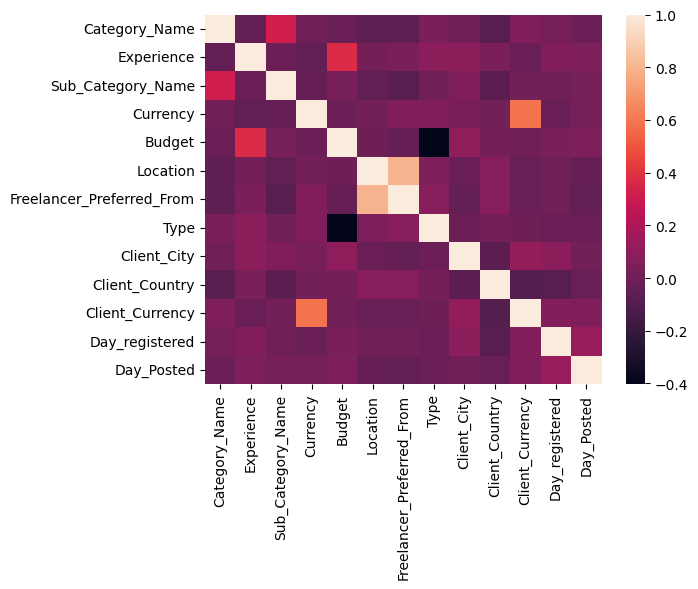

In [40]:
# now, before creating the model it is very important to check for multcolinearity
sns.heatmap(data.corr())

In [41]:
# As there is positive correlation between independent 
#variables we will delete one of them
data2 = data.drop(data[["Currency", "Category_Name"]], axis  = 1)

In [42]:
data2.head()

,Experience,Sub_Category_Name,Budget,Location,Freelancer_Preferred_From,Type,Client_City,Client_Country,Client_Currency,Day_registered,Day_Posted
0,0,85,4.472136,1,0,0,402,63,1,17,30
1,1,67,5.000000,1,0,1,13,63,1,5,30
2,0,21,5.477226,1,0,0,210,24,2,8,30
3,2,0,5.477226,1,0,0,150,63,1,2,30
4,0,85,4.472136,1,0,1,223,63,1,11,30


In [43]:
# now we will select the target variable
x = data2.iloc[:, [0,1,3,4,5,6,7,8,9,10]].values
y = data2.iloc[:, 2].values

In [44]:
# splitting of data into traning and testing
from sklearn.model_selection import train_test_split
xtrain, xtest, ytrain, ytest = train_test_split(x,y, train_size = 0.8,
                                               random_state = 4)

In [46]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(xtrain, ytrain)

LinearRegression()

In [47]:
pred = model.predict(xtest)
pred[:5]

array([7.30421229, 7.04711736, 5.87159766, 7.3831486 , 9.32994349])

In [48]:
ytest[:5]

array([ 3.16227766,  7.74596669,  5.09901951,  3.16227766, 11.18033989])

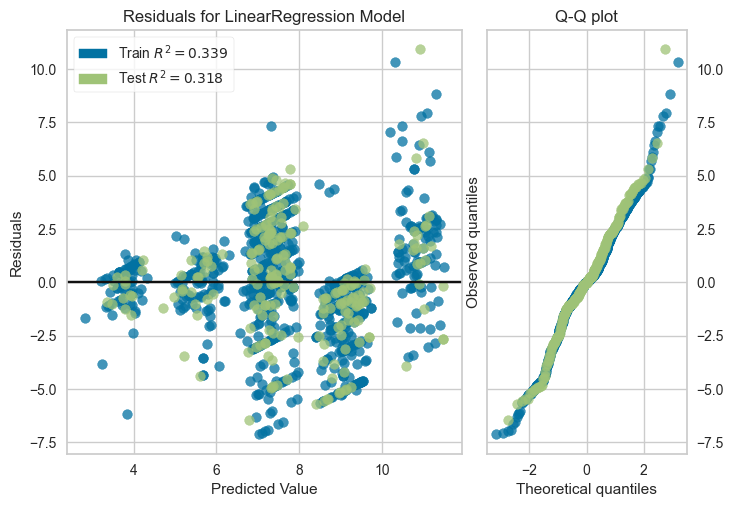

<AxesSubplot: title={'center': 'Residuals for LinearRegression Model'}, xlabel='Predicted Value', ylabel='Residuals'>

In [49]:
from yellowbrick.regressor import ResidualsPlot
residuals_vis = ResidualsPlot(model, hist = False, qqplot = True )
residuals_vis.fit(xtrain, ytrain)
residuals_vis.score(xtest, ytest)
residuals_vis.show()    
        

In [50]:
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(ytest, pred)
mse

6.839131264722065

In [51]:
from sklearn.metrics import mean_absolute_error
mae = mean_absolute_error(ytest, pred)
mae

1.9945106145774645

In [52]:
import math
rmse =math.sqrt(mse)
rmse

2.615173276232775

In [53]:
# so acording to r2 score 30% variation of the budget is explained by features
from sklearn.metrics import r2_score
r2 = r2_score(ytest, pred)
r2

0.3178913025326885

# CLASSIFICATION MODEL

In [54]:
# Now for predicting value of type column we will gor classification
data2 = df.copy()

In [55]:
data2.head()

,Category_Name,Experience,Sub_Category_Name,Currency,Budget,Location,Freelancer_Preferred_From,Type,Client_City,Client_Country,Client_Currency,Day_registered,Day_Posted
0,Technology & Programming,Entry ($),Website Development,GBP,4.472136,remote,ALL,fixed_price,Tadcaster,United Kingdom,GBP,17,30
1,"Marketing, Branding & Sales",Expert ($$$),Sales & Calls,GBP,5.000000,remote,ALL,hourly,Ardrossan,United Kingdom,GBP,5,30
2,Writing & Translation,Entry ($),Content Writing,USD,5.477226,remote,ALL,fixed_price,Kolkata,India,USD,8,30
3,Design,Intermediate ($$),3D Design,GBP,5.477226,remote,ALL,fixed_price,Gloucester,United Kingdom,GBP,2,30
4,Technology & Programming,Entry ($),Website Development,GBP,4.472136,remote,ALL,hourly,Leeds,United Kingdom,GBP,11,30


In [56]:
tp = data2["Type"].copy()
data2 = data2.drop(df[["Type","Day_Posted","Day_registered"]], axis = 1)
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
tp_encoded = encoder.fit_transform(tp)
cat_data = pd.get_dummies(data2)
cat_data.head()

,Budget,Category_Name_Business,Category_Name_Design,Category_Name_Digital Marketing,"Category_Name_Marketing, Branding & Sales",Category_Name_Music & Audio,Category_Name_Social Media,Category_Name_Technology & Programming,"Category_Name_Video, Photo & Image",Category_Name_Writing & Translation,...,Client_Country_Turkey,Client_Country_Uganda,Client_Country_United Arab Emirates,Client_Country_United Kingdom,Client_Country_United States,Client_Country_Venezuela,Client_Country_Viet Nam,Client_Currency_EUR,Client_Currency_GBP,Client_Currency_USD
0,4.472136,0,0,0,0,0,0,1,0,0,...,0,0,0,1,0,0,0,0,1,0
1,5.000000,0,0,0,1,0,0,0,0,0,...,0,0,0,1,0,0,0,0,1,0
2,5.477226,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,1
3,5.477226,0,1,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,1,0
4,4.472136,0,0,0,0,0,0,1,0,0,...,0,0,0,1,0,0,0,0,1,0


In [57]:
x = cat_data.values

In [58]:
y = tp_encoded
y[:5]

array([0, 1, 0, 0, 1])

In [59]:
from sklearn.model_selection import train_test_split
xtrain, xtest,ytrain,ytest = train_test_split(x,y, train_size = 0.7,
                                             random_state = 1)

In [60]:
# we will use adaboost classifier for predicting value of type

from sklearn.ensemble import AdaBoostClassifier
model = AdaBoostClassifier(n_estimators = 50)
model.fit(xtrain, ytrain)
pred = model.predict(xtest)
pred[:5]

array([1, 0, 0, 1, 0])

In [61]:
ytest[:5]

array([1, 0, 0, 1, 0])

In [62]:
# As accuracy score our model is 90 % accurate it means it is performing well
from sklearn.metrics import accuracy_score
accuracy_score(ytest, pred)

0.9011299435028248

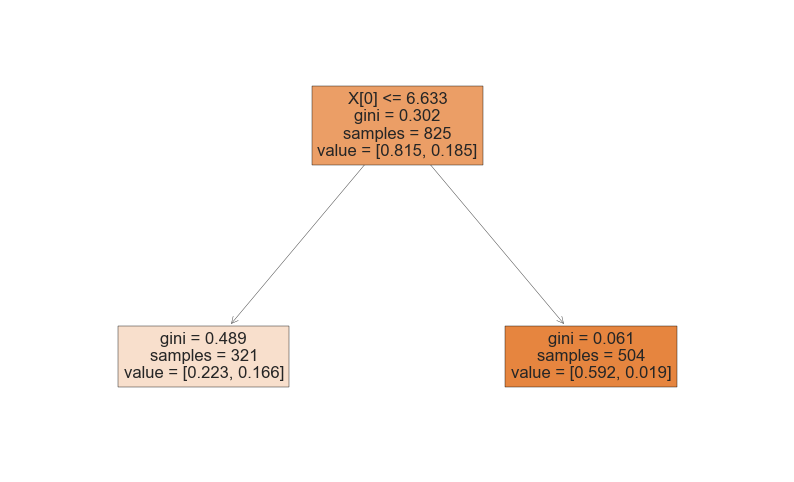

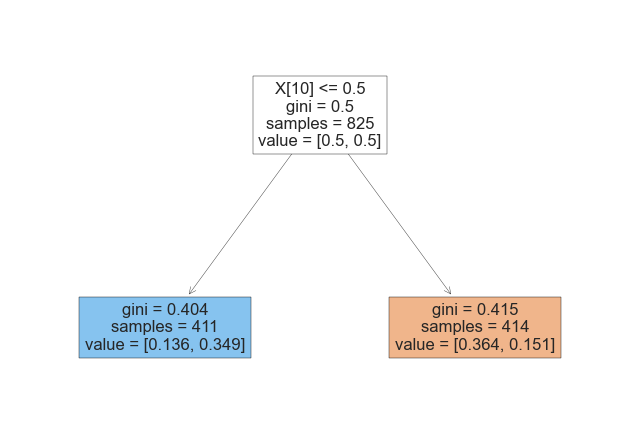

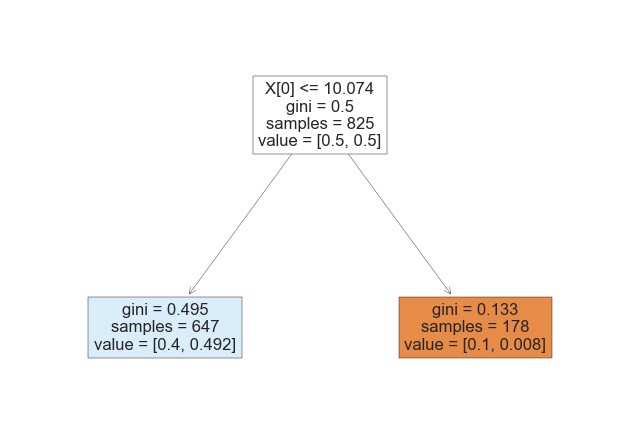

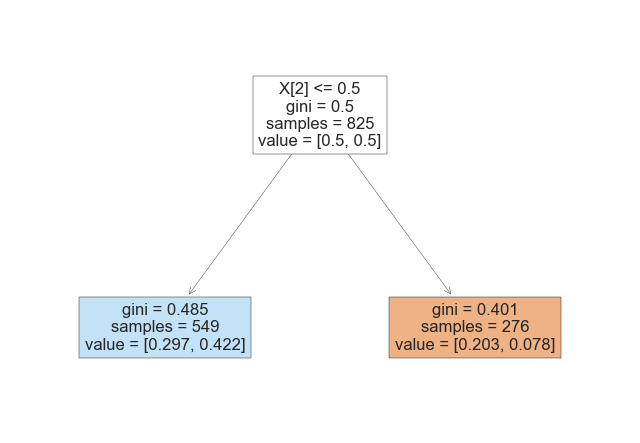

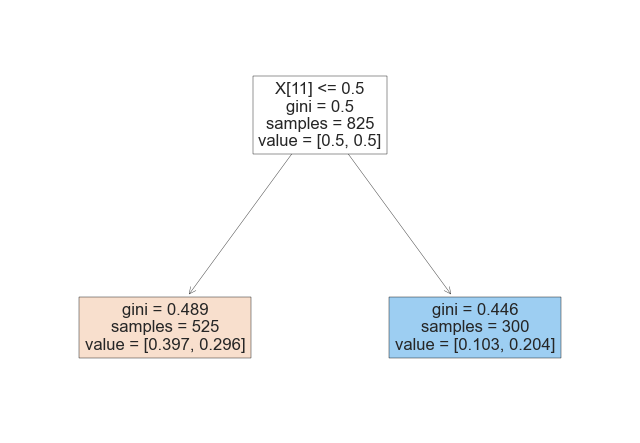

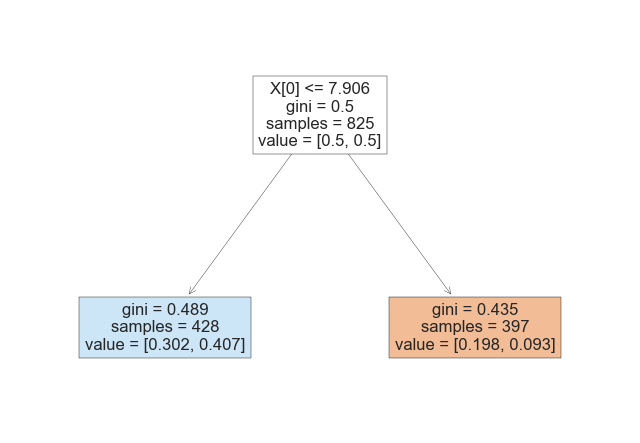

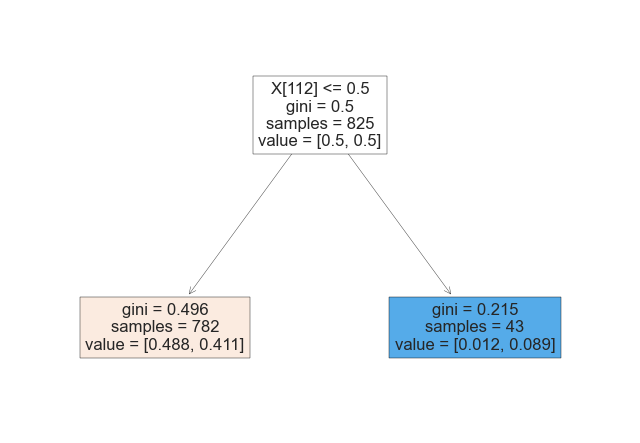

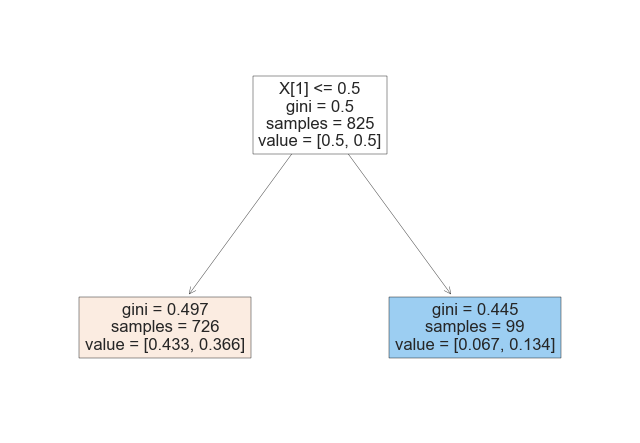

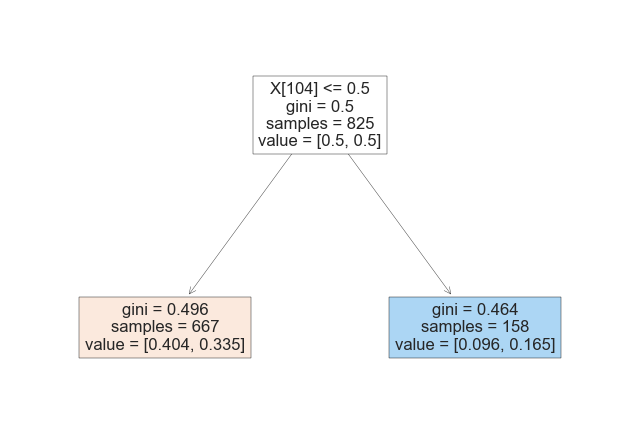

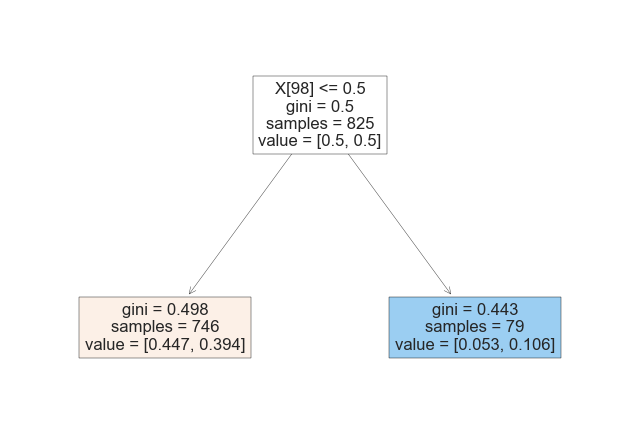

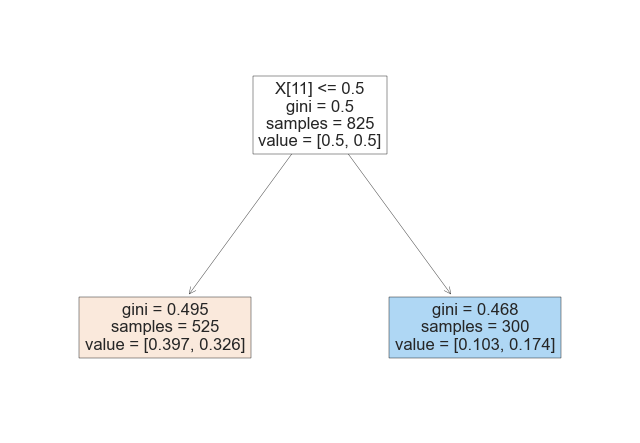

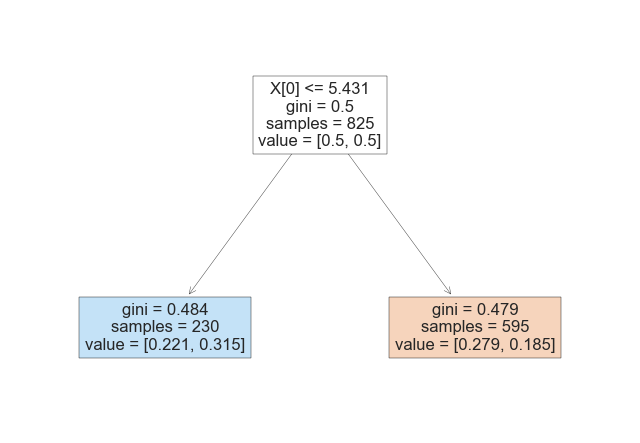

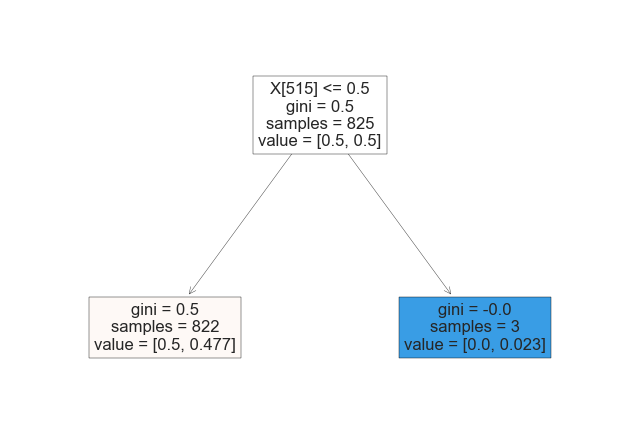

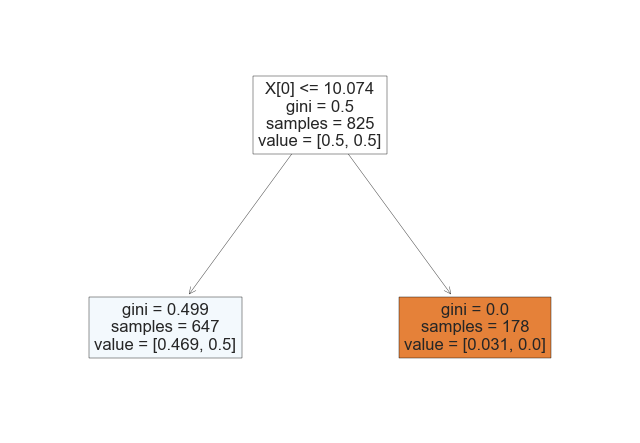

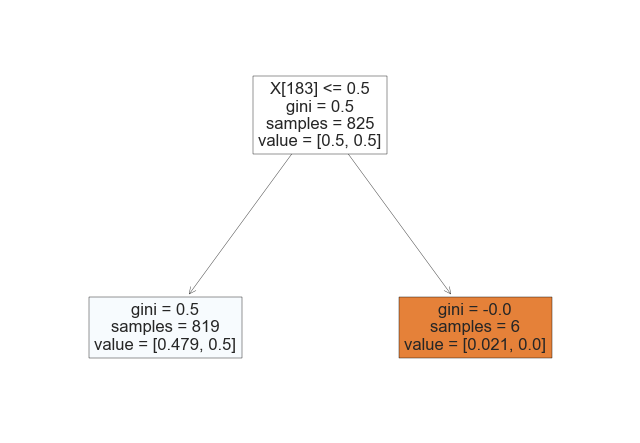

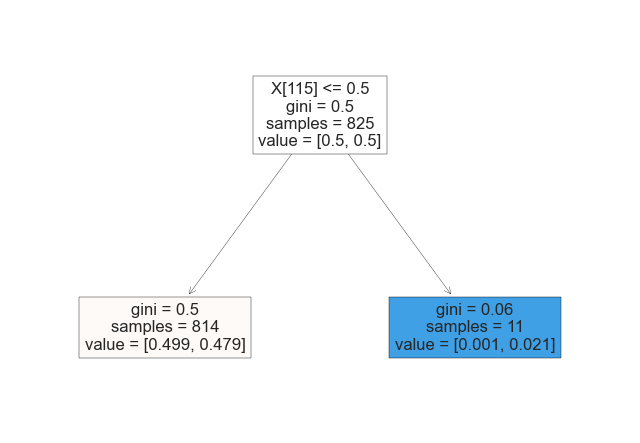

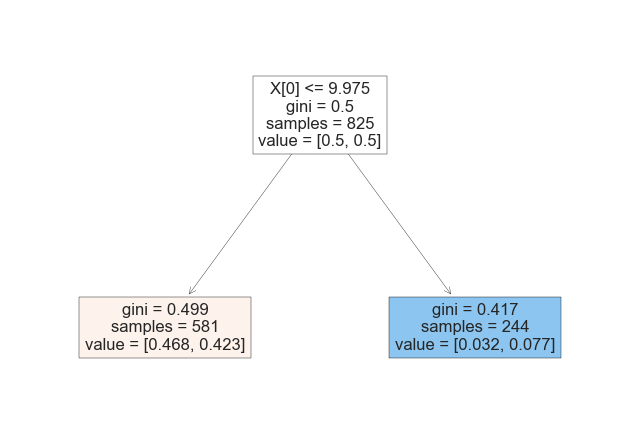

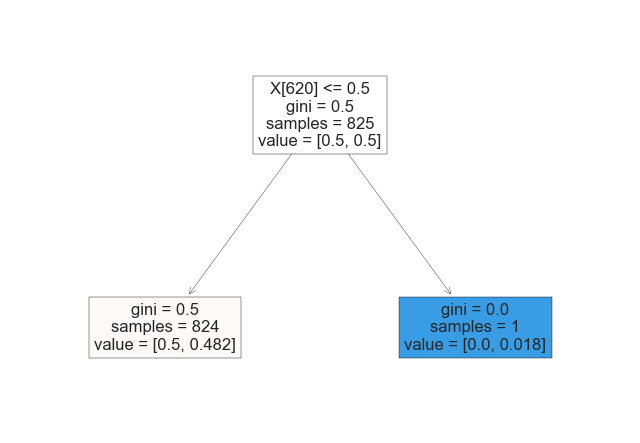

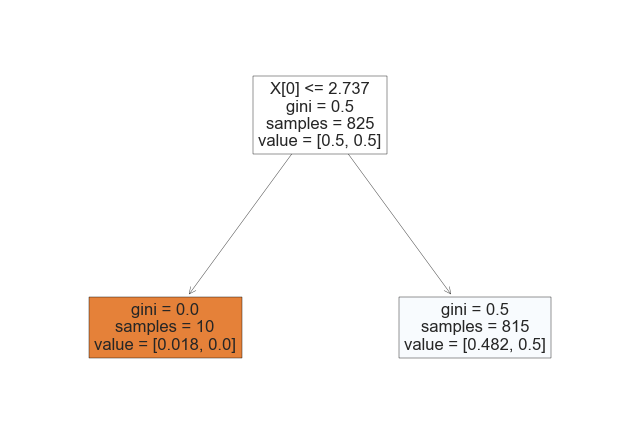

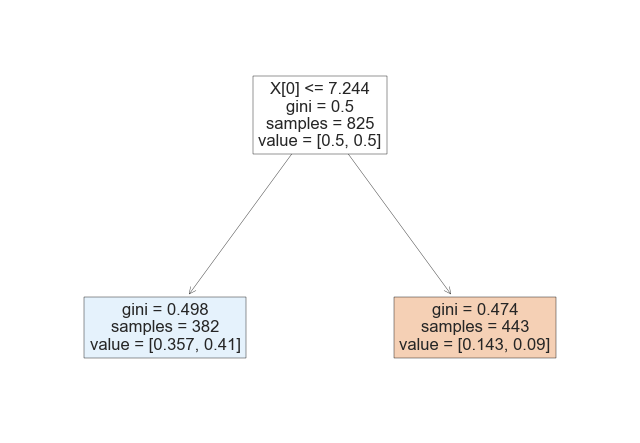

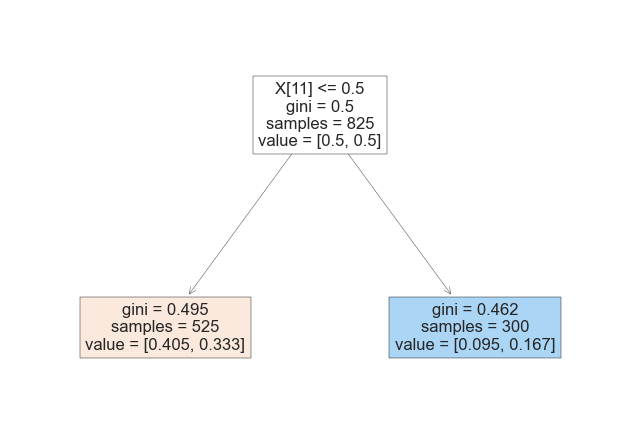

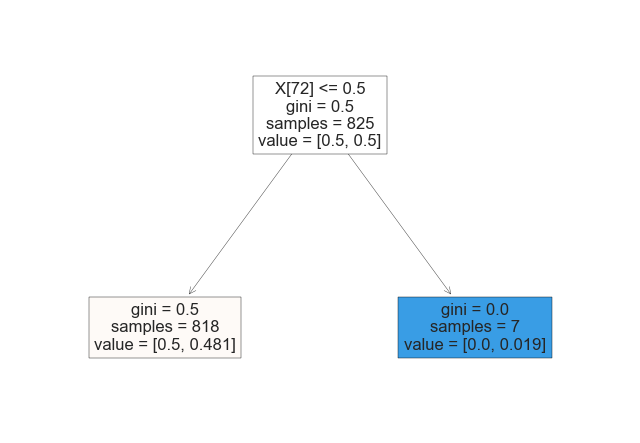

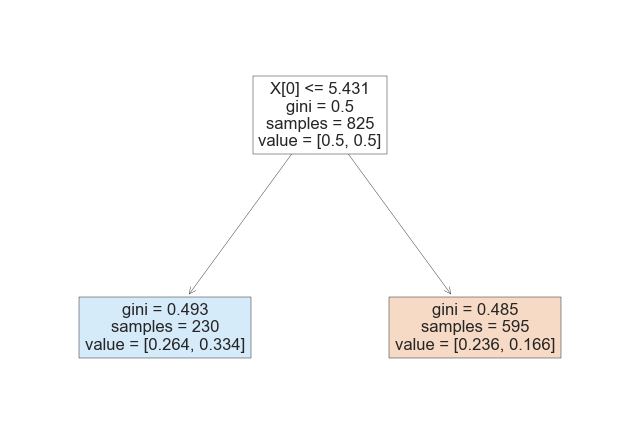

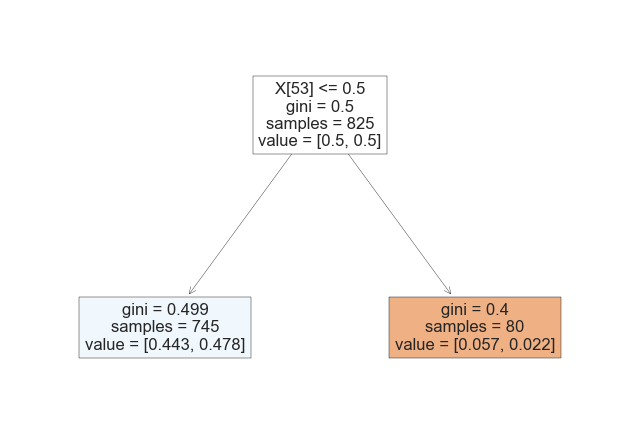

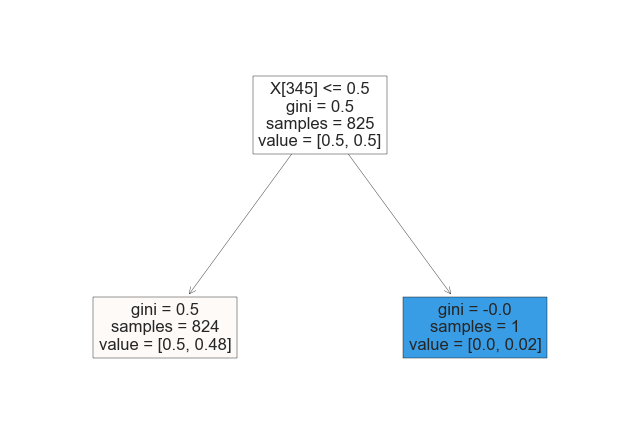

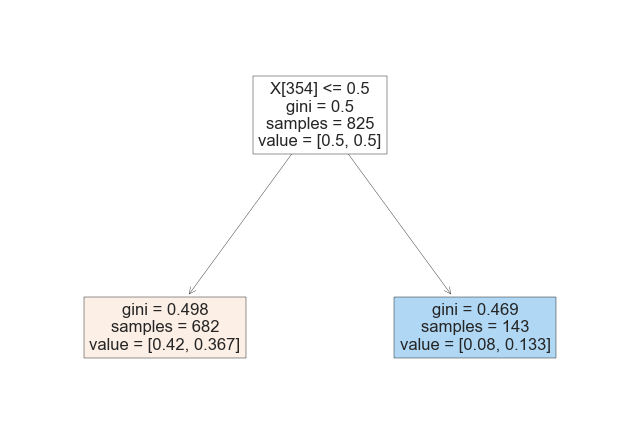

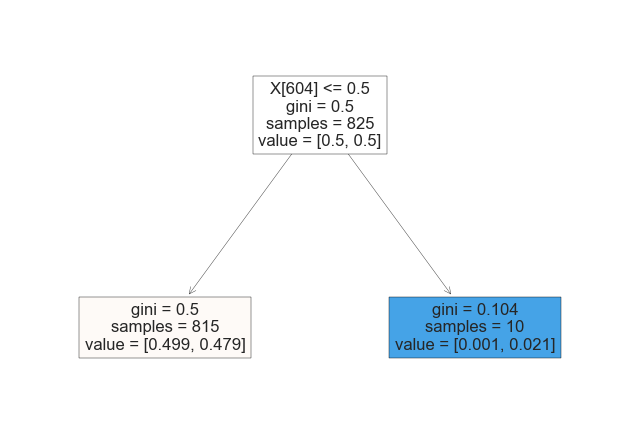

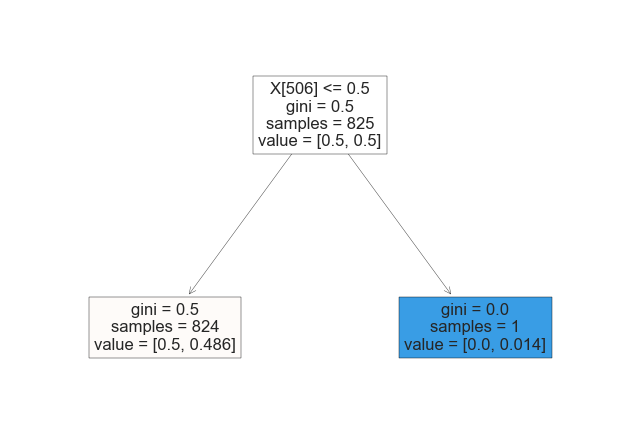

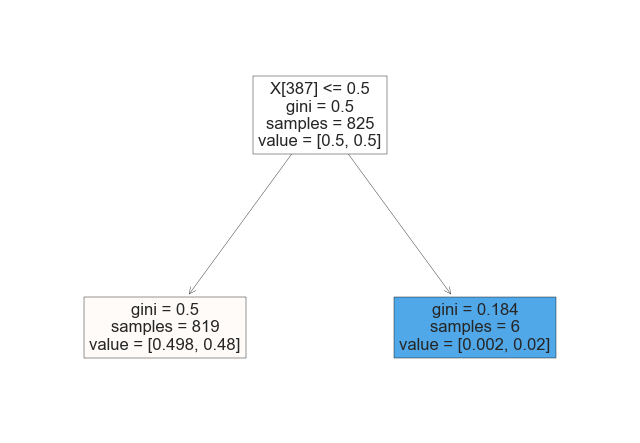

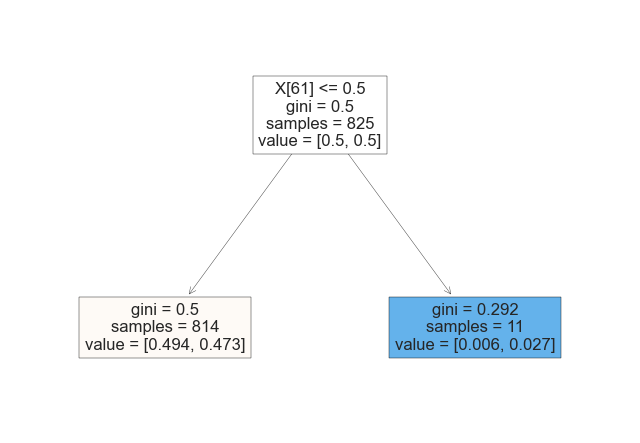

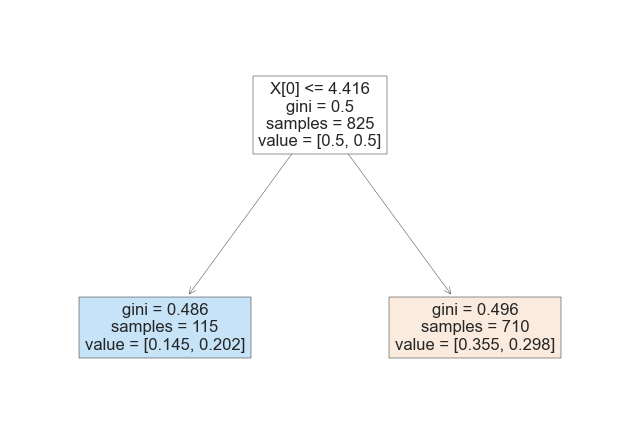

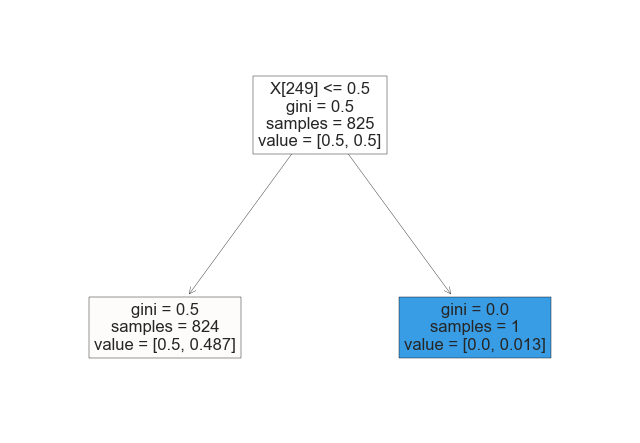

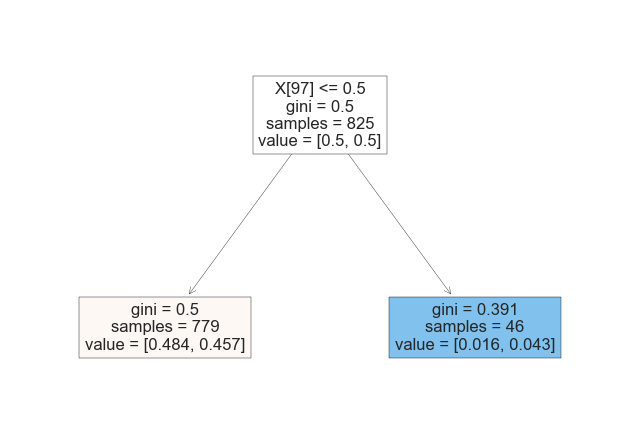

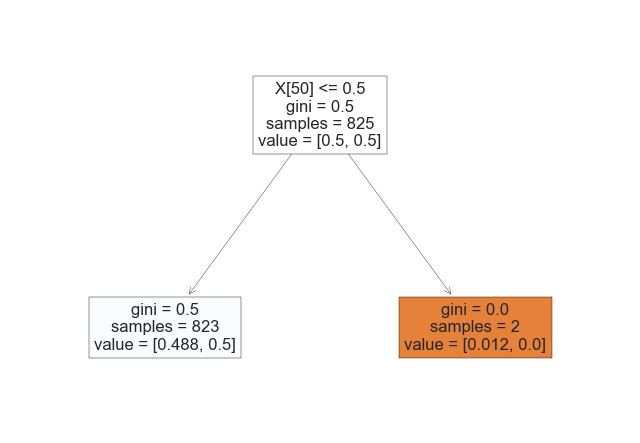

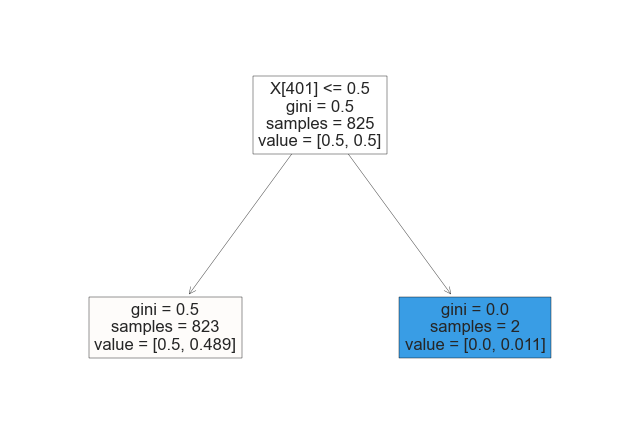

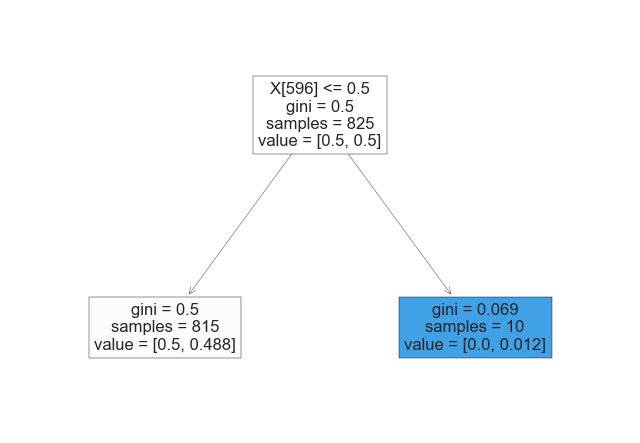

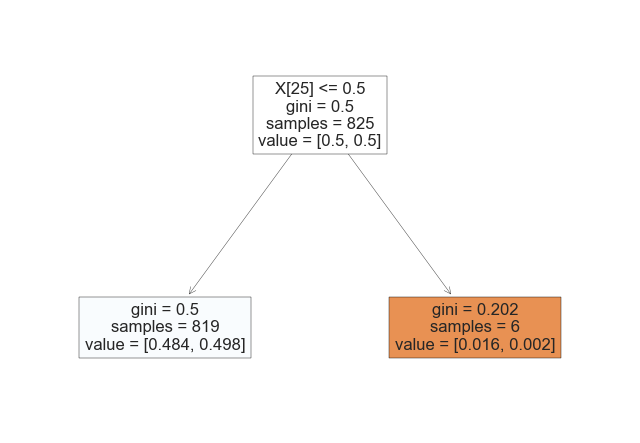

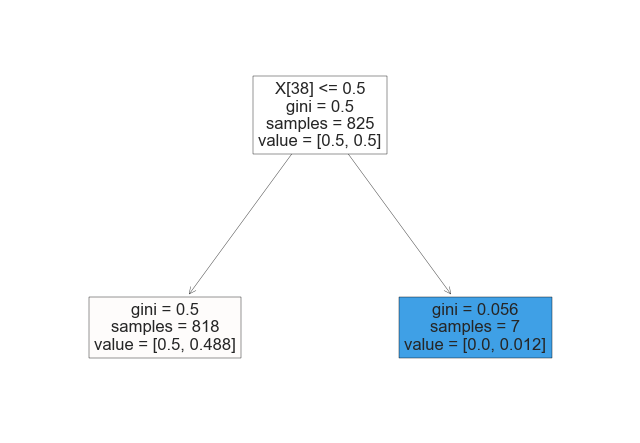

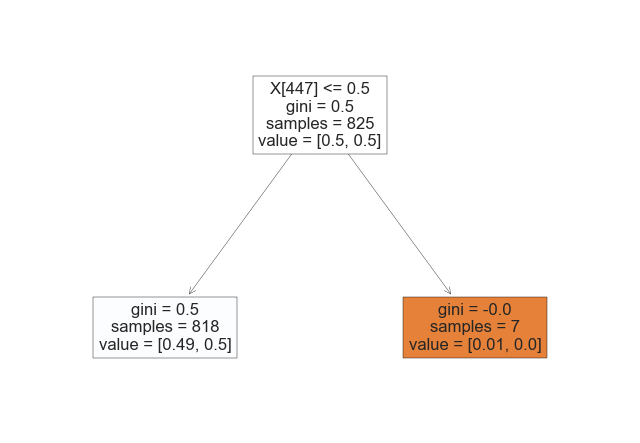

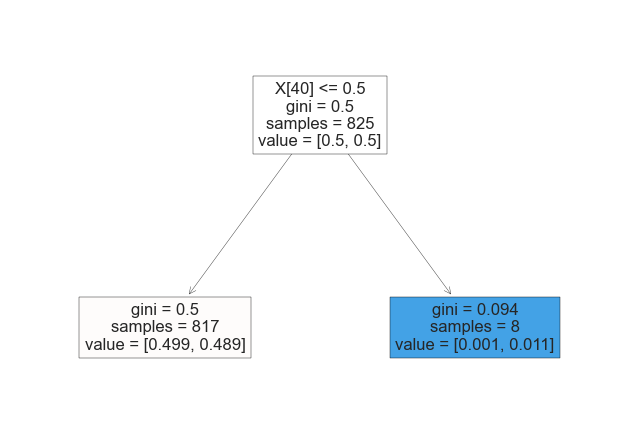

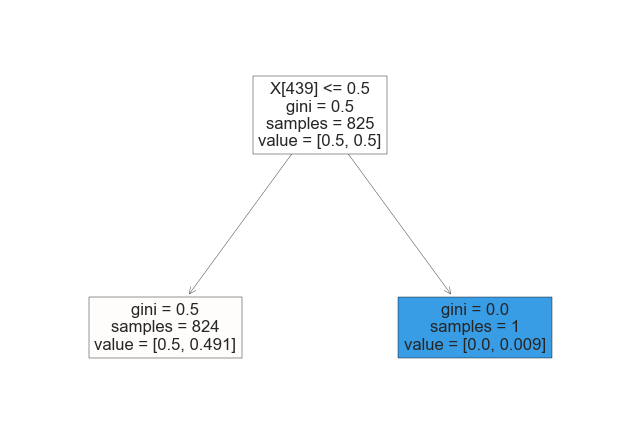

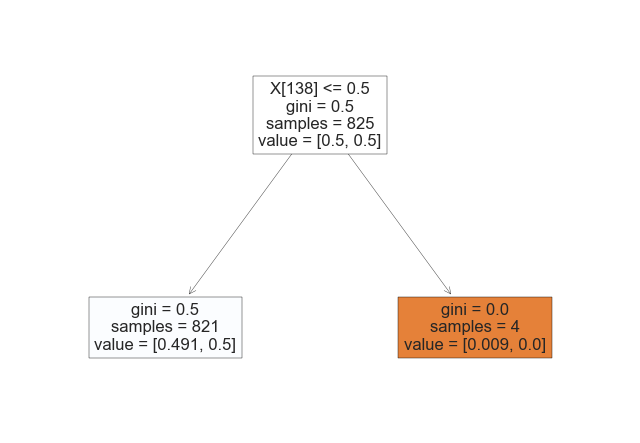

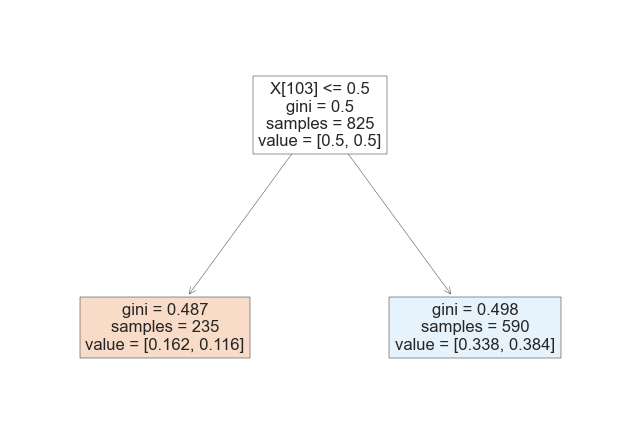

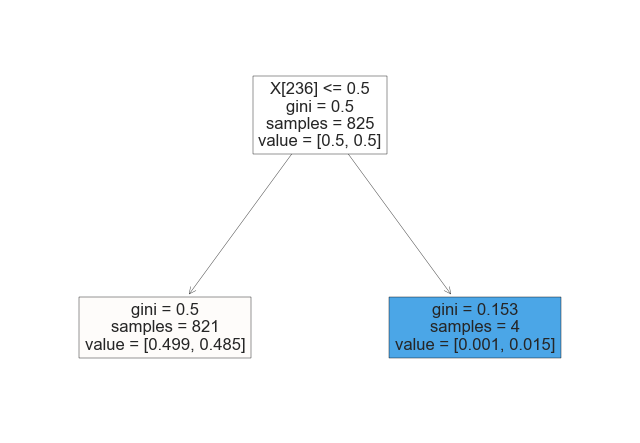

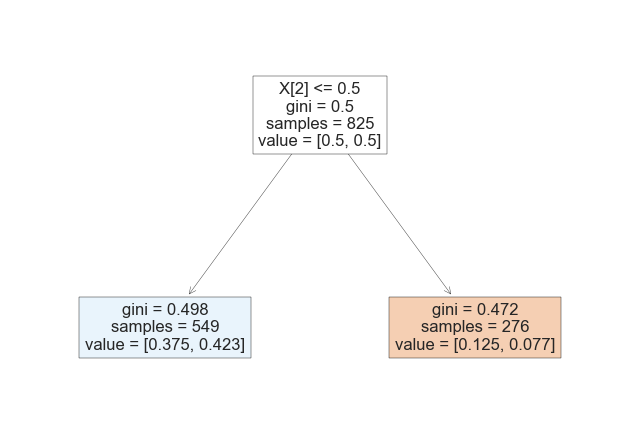

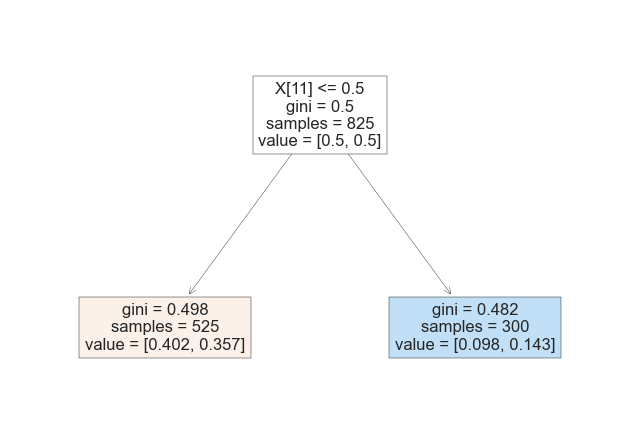

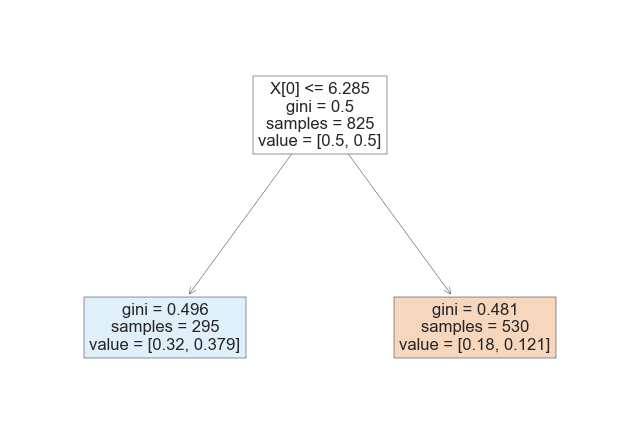

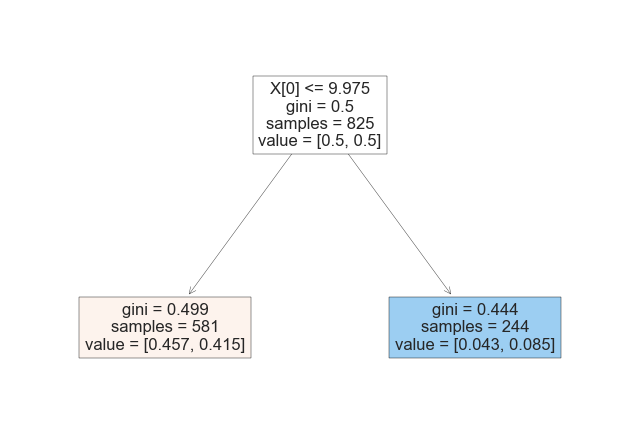

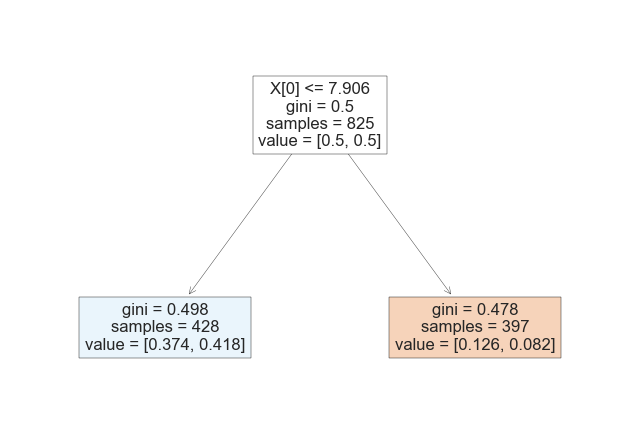

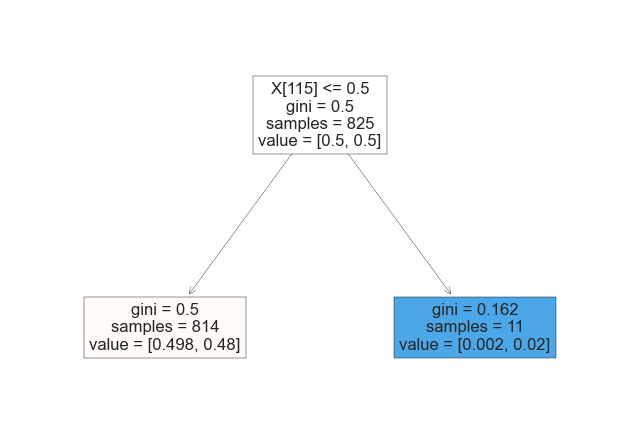

In [63]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt
fig = plt.figure(figsize = (10,6))
for i in model.estimators_:
    plot_tree(i, filled = True, fontsize = 12)
    plt.show()

# End of the project-------------------------------------------------------------------------------------------------